In [1]:
# !wget --no-check-certificate \
#     https://storage.googleapis.com/laurencemoroney-blog.appspot.com/rps.zip \
#     -O /tmp/rps.zip
  
# !wget --no-check-certificate \
#     https://storage.googleapis.com/laurencemoroney-blog.appspot.com/rps-test-set.zip \
#     -O /tmp/rps-test-set.zip

--2019-07-12 20:42:06--  https://storage.googleapis.com/laurencemoroney-blog.appspot.com/rps.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 172.217.8.176
Connecting to storage.googleapis.com (storage.googleapis.com)|172.217.8.176|:443... failed: Connection refused.
--2019-07-12 20:42:06--  https://storage.googleapis.com/laurencemoroney-blog.appspot.com/rps-test-set.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 172.217.8.176
Connecting to storage.googleapis.com (storage.googleapis.com)|172.217.8.176|:443... failed: Connection refused.


In [1]:
import os
import zipfile

# local_zip = '/tmp/rps.zip'
local_zip = '/mnt/external_data/rock_paper_scissors/rps.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp/')
zip_ref.close()

# local_zip = '/tmp/rps-test-set.zip'
local_zip = '/mnt/external_data/rock_paper_scissors/rps-test-set.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp/')
zip_ref.close()

In [2]:
rock_dir = os.path.join('/tmp/rps/rock')
paper_dir = os.path.join('/tmp/rps/paper')
scissors_dir = os.path.join('/tmp/rps/scissors')

print('total training rock images:', len(os.listdir(rock_dir)))
print('total training paper images:', len(os.listdir(paper_dir)))
print('total training scissors images:', len(os.listdir(scissors_dir)))

rock_files = os.listdir(rock_dir)
print(rock_files[:10])

paper_files = os.listdir(paper_dir)
print(paper_files[:10])

scissors_files = os.listdir(scissors_dir)
print(scissors_files[:10])

total training rock images: 840
total training paper images: 840
total training scissors images: 840
['rock02-064.png', 'rock05ck01-007.png', 'rock06ck02-105.png', 'rock05ck01-058.png', 'rock05ck01-024.png', 'rock04-091.png', 'rock03-089.png', 'rock06ck02-070.png', 'rock02-078.png', 'rock05ck01-031.png']
['paper01-042.png', 'paper02-063.png', 'paper06-063.png', 'paper04-086.png', 'paper03-118.png', 'paper05-096.png', 'paper03-030.png', 'paper06-008.png', 'paper06-113.png', 'paper01-111.png']
['testscissors01-001.png', 'scissors02-046.png', 'scissors03-037.png', 'testscissors01-067.png', 'testscissors03-044.png', 'testscissors01-070.png', 'testscissors03-087.png', 'testscissors03-090.png', 'testscissors02-038.png', 'testscissors02-007.png']


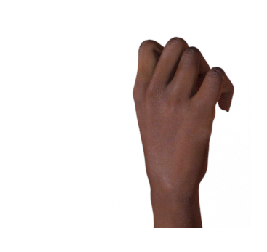

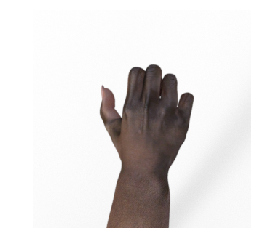

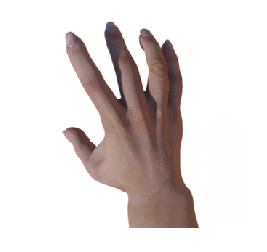

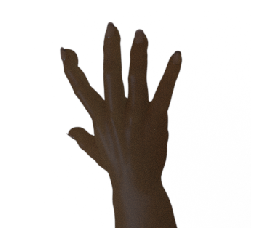

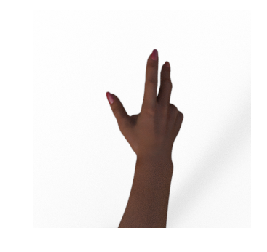

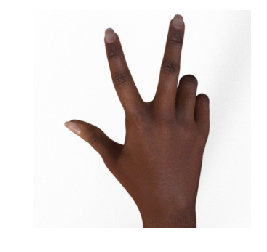

In [3]:
%matplotlib inline

import matplotlib.pyplot as plt
import matplotlib.image as mpimg

pic_index = 2

next_rock = [os.path.join(rock_dir, fname) 
                for fname in rock_files[pic_index-2:pic_index]]
next_paper = [os.path.join(paper_dir, fname) 
                for fname in paper_files[pic_index-2:pic_index]]
next_scissors = [os.path.join(scissors_dir, fname) 
                for fname in scissors_files[pic_index-2:pic_index]]

for i, img_path in enumerate(next_rock+next_paper+next_scissors):
  #print(img_path)
  img = mpimg.imread(img_path)
  plt.imshow(img)
  plt.axis('Off')
  plt.show()

In [4]:
import tensorflow as tf
import keras_preprocessing
from keras_preprocessing import image
from keras_preprocessing.image import ImageDataGenerator

TRAINING_DIR = "/tmp/rps/"
training_datagen = ImageDataGenerator(
      rescale = 1./255,
	  rotation_range=40,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest')

VALIDATION_DIR = "/tmp/rps-test-set/"
validation_datagen = ImageDataGenerator(rescale = 1./255)

train_generator = training_datagen.flow_from_directory(
	TRAINING_DIR,
	target_size=(150,150),
	class_mode='categorical'
)

validation_generator = validation_datagen.flow_from_directory(
	VALIDATION_DIR,
	target_size=(150,150),
	class_mode='categorical'
)

model = tf.keras.models.Sequential([
    # Note the input shape is the desired size of the image 150x150 with 3 bytes color
    # This is the first convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    # The second convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # The third convolution
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # The fourth convolution
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # Flatten the results to feed into a DNN
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dropout(0.5),
    # 512 neuron hidden layer
    tf.keras.layers.Dense(512, activation='relu'),
    # Only 1 output neuron. It will contain a value from 0-1 where 0 for 1 class ('cats') and 1 for the other ('dogs')
    tf.keras.layers.Dense(3, activation='softmax')
])


model.summary()

model.compile(loss = 'categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])

history = model.fit_generator(train_generator, epochs=25, validation_data = validation_generator, verbose = 1)

model.save("rps.h5")


Found 2520 images belonging to 3 classes.
Found 372 images belonging to 3 classes.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 148, 148, 64)      1792      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 74, 74, 64)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 72, 72, 64)        36928     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 17, 17, 128)       0         
___________________________________________________________

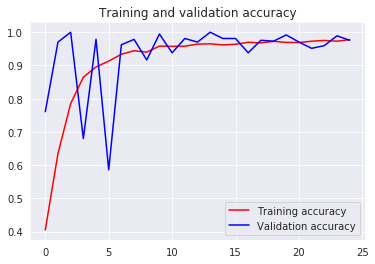

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.figure()
plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend(loc=0)



plt.show()

In [8]:
os.mkdir('/tmp/rps-validation/')

In [9]:
local_ref = '/mnt/external_data/rock_paper_scissors/rps-validation.zip'
zip_ref = zipfile.ZipFile(local_ref)
zip_ref.extractall('/tmp/rps-validation/')
zip_ref.close()

In [20]:
VALIDATION_DIR = os.path.join('/tmp/rps-validation/')

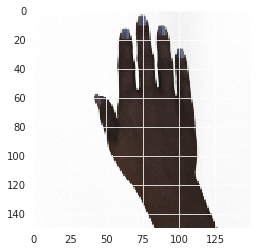

max: 255.0
max: 1.0
paper8.png
[[1.0000000e+00 9.6241355e-16 1.3616078e-15]]
predicted class: paper


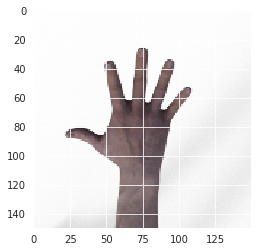

max: 255.0
max: 1.0
paper3.png
[[7.9520047e-01 6.4701169e-08 2.0479944e-01]]
predicted class: paper


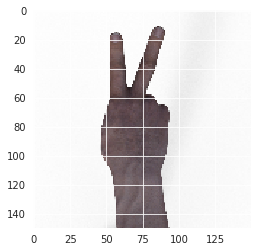

max: 255.0
max: 1.0
scissors-hires2.png
[[2.3534759e-09 4.9545940e-11 1.0000000e+00]]
predicted class: scissors


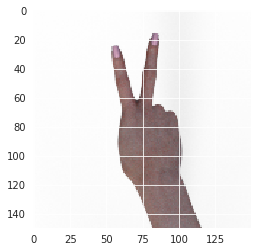

max: 255.0
max: 1.0
scissors4.png
[[1.7091386e-07 3.2053993e-07 9.9999952e-01]]
predicted class: scissors


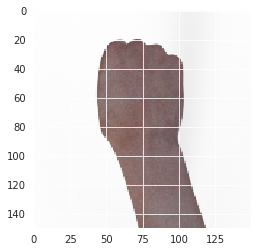

max: 254.0
max: 0.99607843
rock4.png
[[8.4413813e-12 1.0000000e+00 3.5234916e-12]]
predicted class: rock


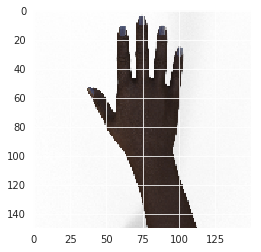

max: 255.0
max: 1.0
paper-hires1.png
[[1.0000000e+00 1.8195028e-13 2.2006026e-10]]
predicted class: paper


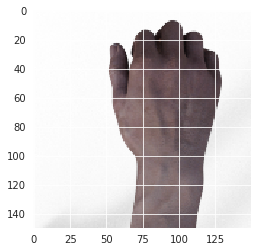

max: 255.0
max: 1.0
rock3.png
[[3.0911213e-12 1.0000000e+00 2.4895955e-16]]
predicted class: rock


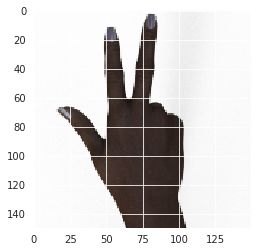

max: 255.0
max: 1.0
scissors8.png
[[5.5214620e-08 2.1090232e-12 1.0000000e+00]]
predicted class: scissors


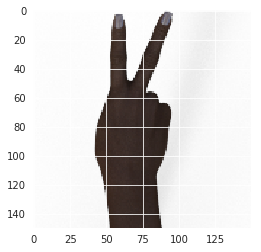

max: 255.0
max: 1.0
scissors7.png
[[6.1004070e-11 6.6524314e-13 1.0000000e+00]]
predicted class: scissors


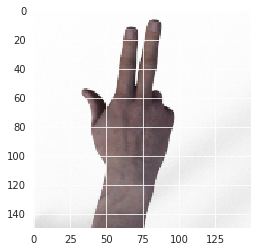

max: 255.0
max: 1.0
scissors3.png
[[2.9279567e-05 4.0366086e-07 9.9997032e-01]]
predicted class: scissors


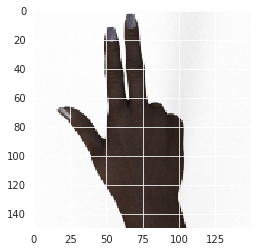

max: 255.0
max: 1.0
scissors9.png
[[8.4887671e-07 6.9915540e-12 9.9999917e-01]]
predicted class: scissors


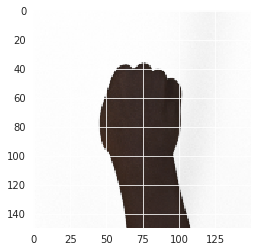

max: 255.0
max: 1.0
rock8.png
[[1.0674869e-12 1.0000000e+00 3.8739746e-14]]
predicted class: rock


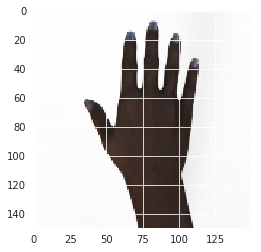

max: 255.0
max: 1.0
paper7.png
[[1.000000e+00 3.890118e-13 2.690816e-09]]
predicted class: paper


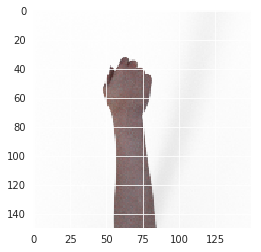

max: 255.0
max: 1.0
rock5.png
[[0.00990079 0.9866316  0.00346763]]
predicted class: rock


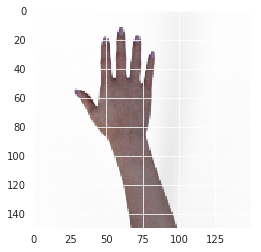

max: 255.0
max: 1.0
paper4.png
[[9.9949038e-01 4.0777427e-06 5.0558581e-04]]
predicted class: paper


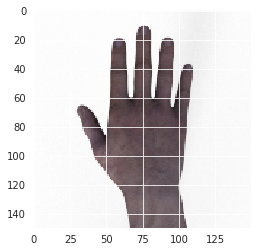

max: 254.0
max: 0.99607843
paper2.png
[[1.000000e+00 9.410528e-11 1.676263e-08]]
predicted class: paper


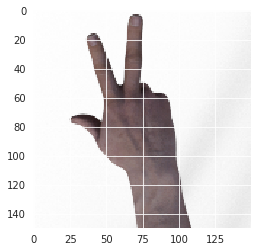

max: 255.0
max: 1.0
scissors2.png
[[9.6488684e-10 1.7086153e-10 1.0000000e+00]]
predicted class: scissors


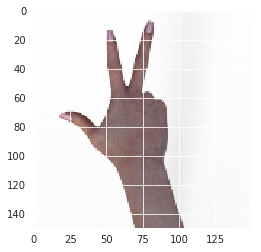

max: 255.0
max: 1.0
scissors5.png
[[3.6743213e-08 3.3314826e-10 1.0000000e+00]]
predicted class: scissors


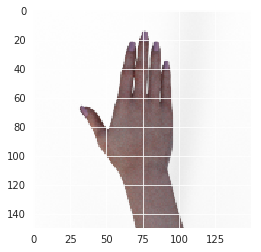

max: 255.0
max: 1.0
paper5.png
[[9.4540733e-01 9.0265949e-04 5.3689998e-02]]
predicted class: paper


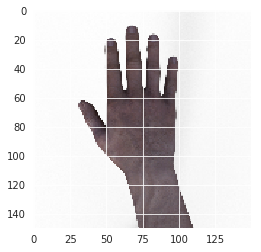

max: 255.0
max: 1.0
paper-hires2.png
[[1.0000000e+00 1.3937367e-13 1.1980637e-10]]
predicted class: paper


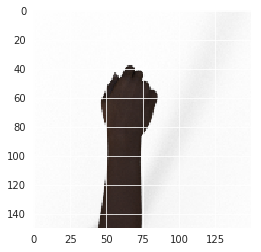

max: 255.0
max: 1.0
rock9.png
[[3.219081e-05 9.999652e-01 2.575175e-06]]
predicted class: rock


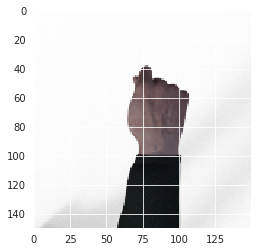

max: 255.0
max: 1.0
rock2.png
[[9.5795713e-07 9.9999666e-01 2.3552723e-06]]
predicted class: rock


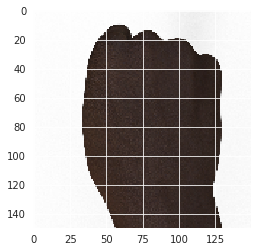

max: 255.0
max: 1.0
rock-hires1.png
[[1.8905129e-23 1.0000000e+00 8.0072440e-27]]
predicted class: rock


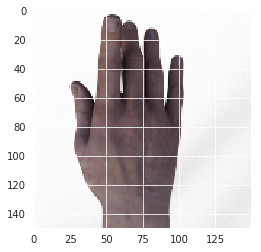

max: 255.0
max: 1.0
paper1.png
[[9.6833515e-01 3.1664487e-02 3.8193727e-07]]
predicted class: paper


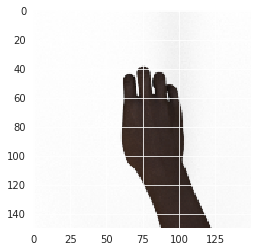

max: 255.0
max: 1.0
rock7.png
[[3.7106249e-09 1.0000000e+00 1.6275152e-12]]
predicted class: rock


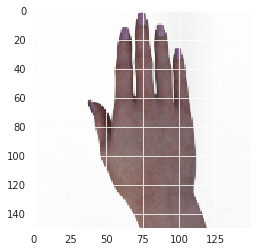

max: 255.0
max: 1.0
paper6.png
[[1.0000000e+00 6.2037289e-13 1.7121858e-12]]
predicted class: paper


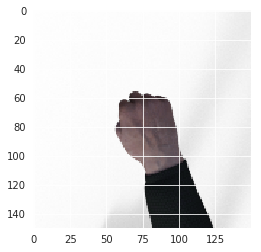

max: 255.0
max: 1.0
rock1.png
[[6.8456485e-10 1.0000000e+00 3.2038205e-09]]
predicted class: rock


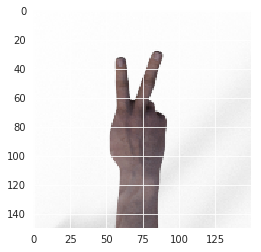

max: 255.0
max: 1.0
scissors1.png
[[1.4736216e-06 2.1362487e-06 9.9999642e-01]]
predicted class: scissors


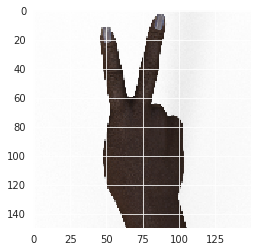

max: 255.0
max: 1.0
scissors-hires1.png
[[3.5408211e-11 8.4120556e-14 1.0000000e+00]]
predicted class: scissors


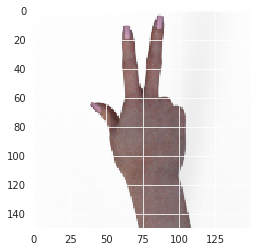

max: 254.0
max: 0.99607843
scissors6.png
[[1.6709309e-06 1.0448200e-07 9.9999821e-01]]
predicted class: scissors


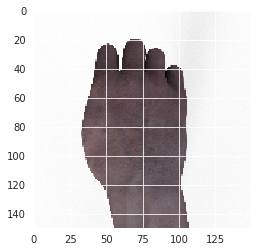

max: 255.0
max: 1.0
rock-hires2.png
[[1.1794488e-14 1.0000000e+00 1.1491097e-17]]
predicted class: rock


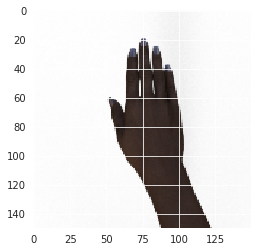

max: 255.0
max: 1.0
paper9.png
[[9.9993634e-01 6.4172077e-06 5.7212426e-05]]
predicted class: paper


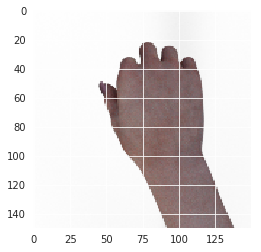

max: 254.0
max: 0.99607843
rock6.png
[[4.4554516e-09 1.0000000e+00 2.3655681e-13]]
predicted class: rock


In [23]:
import numpy as np
# from google.colab import files
from keras.preprocessing import image

# uploaded = files.upload()
files = os.listdir('/tmp/rps-validation/')

class_dict = {0: "paper",
             1: 'rock',
             2: 'scissors'}
# for fn in uploaded.keys():
for fn in files:
 
    # predicting images
    path = fn

    img = image.load_img(os.path.join(VALIDATION_DIR, path), target_size=(150, 150))
    x = image.img_to_array(img)
    plt.imshow(x.astype(int))
    plt.show()
    print('max:', np.max(x))
    x /= 255
    x = np.expand_dims(x, axis=0)
    print('max:', np.max(x))

    images = np.vstack([x])
    classes = model.predict(images, batch_size=10)
    pred_idx = np.argmax(classes)
    pred_class = class_dict[pred_idx]
    print(fn)
    print(classes)
    print('predicted class:', pred_class)